<a href="https://colab.research.google.com/github/Dayanand-JD/Exploratory-Data-analysis-of-US-Accidents/blob/main/Exploratory_Data_analysis_of_US_Accidents_(4_2_million_records).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data analysis of 4.2 Millon US Road accidents.

This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are **collected from February 2016 to Dec 2020**, using **two APIs that provide streaming traffic incident** (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the **US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks**. Currently, there are about **4.2 million accident records in this dataset**.



-Kaggle
-informaiton about accidents
-can use useful to prevent accidents
-mention that this does not contain data about New York



In [3]:
!pip install opendatasets --upgrade --quiet #library to add data from kaggle.

import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
#for downbloading dataset to google colob
od.download(download_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dayanandjd
Your Kaggle Key: ··········


  3%|▎         | 9.00M/299M [00:00<00:03, 91.1MB/s]

100%|██████████| 299M/299M [00:01<00:00, 179MB/s]


In [4]:
data_filename = './us-accidents/US_Accidents_Dec20.csv'

# Data Preparation and Cleaning
-Load the file using Pandas
-Look at some information about the data & the columns

1.   Load the file using Pandas
2.   Look at some information about the data & the columns
3.   Fix any missing or incorrect values


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
style.use('fivethirtyeight')
df=pd.read_csv(data_filename)
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [8]:
df.describe()


,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


Percentage of missing values per column

In [9]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

End_Lat                  6.418076e-01
End_Lng                  6.418076e-01
Number                   6.350674e-01
Precipitation(in)        4.880258e-01
Wind_Chill(F)            4.479581e-01
TMC                      3.581924e-01
Wind_Speed(mph)          1.132478e-01
Visibility(mi)           2.331176e-02
Weather_Condition        2.324443e-02
Humidity(%)              2.255548e-02
Temperature(F)           2.124020e-02
Wind_Direction           1.975433e-02
Pressure(in)             1.804684e-02
Weather_Timestamp        1.480057e-02
Airport_Code             2.120003e-03
Timezone                 1.090362e-03
Zipcode                  3.052540e-04
Nautical_Twilight        3.331332e-05
Astronomical_Twilight    3.331332e-05
Civil_Twilight           3.331332e-05
Sunrise_Sunset           3.331332e-05
City                     3.236826e-05
Description              4.725294e-07
Amenity                  0.000000e+00
Street                   0.000000e+00
Source                   0.000000e+00
Severity    

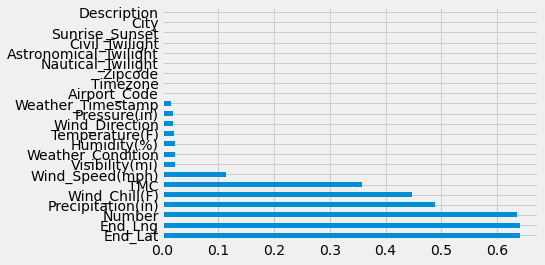

In [17]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

#Exploratory Analysis and Visualization
Columns we'll analyze:

1.   City
2.   Start time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition




In [11]:
df.columns


Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

top *20* cities with most accidents 

In [13]:
cities_by_accident = df.City.value_counts()
cities_by_accident.head(20)

Houston          114905
Los Angeles       92701
Charlotte         88887
Dallas            77303
Austin            70538
Miami             63162
Raleigh           52876
Atlanta           46328
Baton Rouge       42814
Nashville         41850
Orlando           39561
Oklahoma City     39484
Sacramento        38061
Phoenix           32805
Minneapolis       31781
San Diego         29416
Seattle           28004
Richmond          27907
San Antonio       27516
Jacksonville      24009
Name: City, dtype: int64

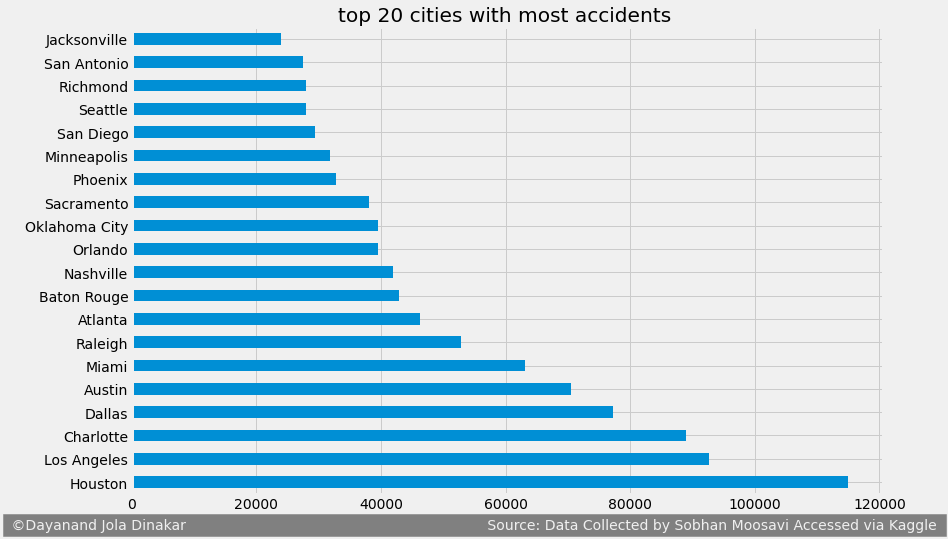

In [43]:

cities_by_accident[:20].plot(kind='barh', figsize=(12,8), title='top 20 cities with most accidents ').text( x=-20000, y=-2,
    s = ' ©Dayanand Jola Dinakar                                                                   Source: Data Collected by Sobhan Moosavi Accessed via Kaggle ',
               fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey');

##Start time

In [46]:
df.Start_Time.head(5)


0    2016-02-08 05:46:00
1    2016-02-08 06:07:59
2    2016-02-08 06:49:27
3    2016-02-08 07:23:34
4    2016-02-08 07:39:07
Name: Start_Time, dtype: object

Converting to datetime format from timestamp

In [51]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time.head(5)

0   2016-02-08 05:46:00
1   2016-02-08 06:07:59
2   2016-02-08 06:49:27
3   2016-02-08 07:23:34
4   2016-02-08 07:39:07
Name: Start_Time, dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


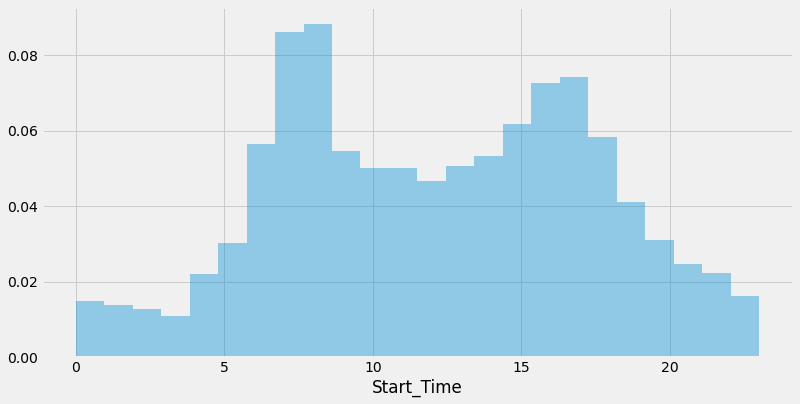

In [64]:
plt.figure(figsize=(12, 6))
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)




* A **high percentage of accidents** occur between **6 am to 10 am **(probably people in a hurry to get to work)
*   Next higest percentage is **3 pm to 6 pm.**





Let's trend for the in a week

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


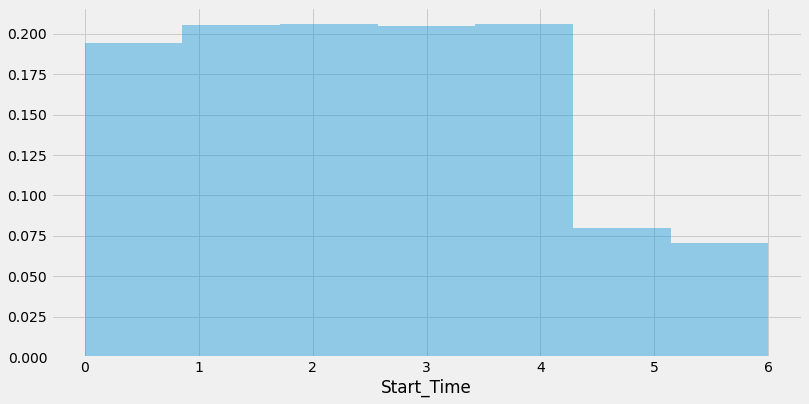

In [66]:
plt.figure(figsize=(12,6))
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)



*   Less accdients on weekends 
*   More accidents on weekdays



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


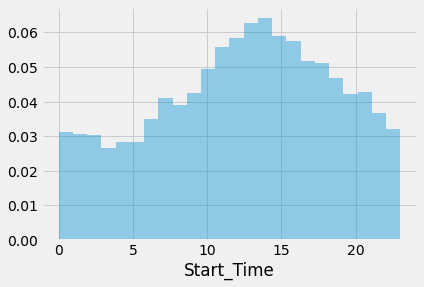

In [67]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)



* on sunday more accidents between 10-15


